Convert MATLAB code to python

In [ ]:
# Polygon dataset was created for each point by using Thiessen Polygon algorithm
https://pro.arcgis.com/en/pro-app/latest/tool-reference/analysis/create-thiessen-polygons.htm

In [ ]:
# Population density was aggregated for each polygon area


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [ ]:
postcode=gpd.read_file('D:/Dis/GIS model/data/centroid.shp') # importing shapefile which contain lat long and number of population in each postcode area

In [ ]:
postcode

,Id,Input_FID,Shape_Leng,id1,OBJECTID,id1_1,COUNT,AREA,SUM,Shape_Le_1,Shape_Area,ORIG_FID,lat,long,geometry
0,0,49281,0.148670,1,1,0,3215.0,0.000248,10134.064690,0.148670,6.055392e-04,1,50.759681,-1.658104,POINT (-1.65810 50.75968)
1,0,49285,0.050245,2,2,0,68.0,0.000005,84.336251,0.050245,5.711410e-05,2,50.785958,-1.640108,POINT (-1.64011 50.78596)
2,0,49283,0.018635,3,3,0,23.0,0.000002,29.302264,0.018635,1.952324e-05,3,50.774809,-1.630178,POINT (-1.63018 50.77481)
3,0,49284,0.018725,4,4,0,51.0,0.000004,62.574111,0.018725,2.023600e-05,4,50.776017,-1.635331,POINT (-1.63533 50.77602)
4,0,49286,0.489819,5,5,0,4705.0,0.000363,7432.806049,0.489819,7.913104e-03,5,50.786853,-1.715179,POINT (-1.71518 50.78685)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242937,0,235851,0.004578,242911,0,0,0.0,0.000000,0.000000,0.004578,1.223438e-06,242938,51.391147,1.398140,POINT (1.39814 51.39115)
242938,0,235914,0.002495,242913,0,0,0.0,0.000000,0.000000,0.002495,3.392920e-07,242939,51.390944,1.399819,POINT (1.39982 51.39094)
242939,0,235917,0.005775,242914,0,0,0.0,0.000000,0.000000,0.005775,6.821611e-07,242940,51.392153,1.400192,POINT (1.40019 51.39215)
242940,0,235901,0.002381,242916,0,0,0.0,0.000000,0.000000,0.002381,2.732927e-07,242941,51.391022,1.404098,POINT (1.40410 51.39102)


In [ ]:
postcode['sum']=postcode['SUM'].astype(int) # converting to integer
df=postcode.copy()


In [ ]:
import numpy as np
a=df[["lat"]]
b=df[["long"]]
X=np.column_stack((a,b))  # creating lat and long pairs

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
#from sklearn_extra.cluster import KMedoids
kmeans = KMeans(n_clusters = 16,init='k-means++',n_init=10, random_state=0, max_iter=1000)
y_kmeans = kmeans.fit_predict(X,sample_weight=df['sum'].values)  # fiting kmeans model where totoal number of population was used as weighting facotr
k=pd.DataFrame(y_kmeans, columns=['cluster']) # create new dataframe adding cluster values
postcode=postcode.join(k)

In [ ]:
kmeans

KMeans(max_iter=1000, n_clusters=16, random_state=0)

In [ ]:
C=kmeans.cluster_centers_ # cluster center points C
C

array([[51.28568683,  1.35264903],
       [50.9426361 , -1.42909917],
       [51.3440408 , -0.49311881],
       [51.32717098,  0.57199577],
       [51.77878128, -1.31946263],
       [51.57857987, -0.67619361],
       [50.86948863, -0.11759603],
       [50.82348046, -1.10412278],
       [51.29976878,  0.26795867],
       [50.84187829, -0.5481606 ],
       [50.86427561,  0.40814925],
       [51.288329  , -0.78218055],
       [51.20314101, -0.19595365],
       [51.40382669, -1.07178817],
       [51.20180424,  1.01601967],
       [51.96175143, -0.79171216]])

In [ ]:
df=pd.DataFrame(C,columns=['latitude','longitude']) # convert center points into lat and long

In [ ]:
df

,latitude,longitude
0,51.285687,1.352649
1,50.942636,-1.429099
2,51.344041,-0.493119
3,51.327171,0.571996
4,51.778781,-1.319463
5,51.578580,-0.676194
6,50.869489,-0.117596
7,50.823480,-1.104123
8,51.299769,0.267959
9,50.841878,-0.548161


In [ ]:
df.to_csv("D:/Dis/GIS model/kmplus.csv") # save the file in excel to visualize in gis software

In [ ]:
# ignor these parts

In [ ]:
list1=['BN','BR','CR','CT','DA','GU','HP','KT','ME','MK','OX','PO',
    'RG','RH','SL','SM','SO','TN','TW','UB','WD']

In [ ]:
data=postcode[postcode.postcode.str.startswith(tuple(list1))]

In [ ]:
data

,id,postcode,latitude,longitude
65591,69025,WD7 9EU,51.694131,-0.292763
65592,69026,WD7 9EW,51.684390,-0.272313
65593,69027,WD7 9EX,51.693555,-0.292090
65594,69028,WD7 9EY,51.694202,-0.291487
65595,69029,WD7 9EZ,51.692161,-0.292099
...,...,...,...,...
1784675,2693324,WD6 9PZ,51.655359,-0.279031
1784676,2693327,WD7 0GJ,51.683007,-0.317272
1784677,2693328,WD7 9FL,51.703386,-0.303694
1784678,2693329,WD7 9FN,51.703231,-0.302918


In [ ]:
data.to_csv("D:/Dis/GIS model/south_east_post.csv",index=False)

In [ ]:
import geopandas as gpd

In [ ]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

<AxesSubplot:>

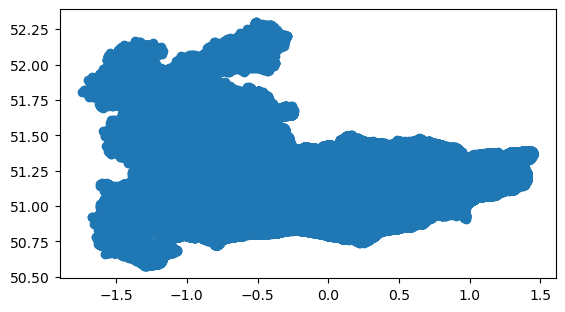

In [ ]:
gdf.plot()

In [ ]:
gdf=gdf.dropna()

In [ ]:
import numpy as np
a=gdf[["latitude"]]
b=gdf[["longitude"]]
X=np.column_stack((a,b))

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
#from sklearn_extra.cluster import KMedoids
kmeans = KMeans(n_clusters = 16)
y_kmeans = kmeans.fit_predict(X)
k=pd.DataFrame(y_kmeans, columns=['cluster'])
gdf=gdf.join(k)

In [ ]:
gdf # clustered values

,id,postcode,latitude,longitude,geometry,cluster
65591,69025,WD7 9EU,51.694131,-0.292763,POINT (-0.29276 51.69413),1.0
65592,69026,WD7 9EW,51.684390,-0.272313,POINT (-0.27231 51.68439),1.0
65593,69027,WD7 9EX,51.693555,-0.292090,POINT (-0.29209 51.69356),1.0
65594,69028,WD7 9EY,51.694202,-0.291487,POINT (-0.29149 51.69420),1.0
65595,69029,WD7 9EZ,51.692161,-0.292099,POINT (-0.29210 51.69216),1.0
...,...,...,...,...,...,...
1784675,2693324,WD6 9PZ,51.655359,-0.279031,POINT (-0.27903 51.65536),NaN
1784676,2693327,WD7 0GJ,51.683007,-0.317272,POINT (-0.31727 51.68301),NaN
1784677,2693328,WD7 9FL,51.703386,-0.303694,POINT (-0.30369 51.70339),NaN
1784678,2693329,WD7 9FN,51.703231,-0.302918,POINT (-0.30292 51.70323),NaN


In [ ]:
C=kmeans.cluster_centers_ # cluster center points C
C

array([[50.83306807, -1.08272081],
       [51.33297694, -0.22020083],
       [51.28309554, -0.71335483],
       [51.31425033,  0.47276921],
       [52.06426882, -0.65405937],
       [51.25593092,  1.24166293],
       [51.80321212, -1.31703208],
       [50.95206496, -0.152059  ],
       [50.91337372,  0.32706145],
       [50.908254  , -1.39055435],
       [50.85015565, -0.56841502],
       [51.65479722, -0.7453154 ],
       [51.52854943, -0.43311092],
       [51.20462671,  0.82621326],
       [51.37917013,  0.10410051],
       [51.39170924, -1.08954263]])

In [ ]:
df=pd.DataFrame(C,columns=['latitude','longitude']) # convert center points into dataframe 

In [ ]:
df

,latitude,longitude
0,50.833068,-1.082721
1,51.332977,-0.220201
2,51.283096,-0.713355
3,51.314250,0.472769
4,52.064269,-0.654059
5,51.255931,1.241663
6,51.803212,-1.317032
7,50.952065,-0.152059
8,50.913374,0.327061
9,50.908254,-1.390554


In [ ]:
df.to_csv("D:/Dis/GIS model/check.csv") # save the file in excel to visualize in gis software

In [ ]:
# visualizaation

In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude)) # convert center points into geodataframe

<AxesSubplot:>

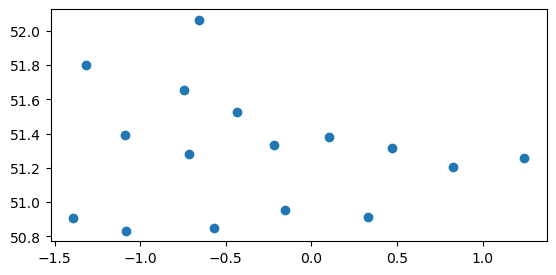

In [ ]:
gdf.plot()

In [ ]:
#import existing hospitals locations

In [ ]:
cdc=pd.read_csv(r'D:\Dis\GIS model\cdc.csv')

In [ ]:
gdf = gpd.GeoDataFrame(
    cdc, geometry=gpd.points_from_xy(cdc.longitude, cdc.latitude)) # convert center points into geodataframe

<AxesSubplot:>

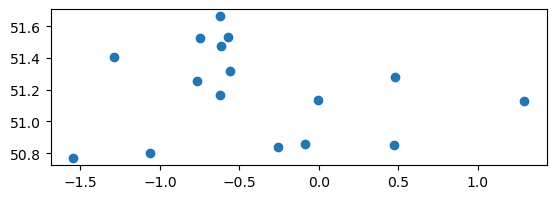

In [ ]:
gdf.plot()

In [ ]:
# It's better to visualize in GIS softwares

In [ ]:
###### ignor these parts

In [ ]:
sub=pd.read_csv('D:/Dis/GIS model/CDC location extract.csv')
subset_list=sub['_address'].values

In [ ]:
sub

,Sites,Run_By,Type,_address
0,"Buckland Hospital, Dover",East Kent University Hospitals,Large excl endoscopy,CT17 0HD
1,West Kent Early Adopter Site,MTW,Large excl endoscopy,ME16 9NT
2,"Bexhill Hospital, Bexhill",East Sussex NHS Trust,Large excl endoscopy,TN40 2DZ
3,Queen Victoria Hospital,East Sussex NHS Trust,Large excl endoscopy,RH19 3DZ
4,"Falmer Community Stadium, Brighton",Sussex MSK Partnership,Large excl endoscopy,BN1 9SG
5,"Southlands Hospital, Shoreham with Spoke at Bo...",University Hospitals Sussex,Standard with spoke,BN43 6TQ
6,"St Mary’s Community Hospital Campus, Portsmouth",Portsmouth Hospitals NHS Trust,Large with endoscopy,PO3 6AD
7,Lymington New Forest Hospital,Southern Heath NHS FT,Large with Endoscopy,SO41 8QD
8,Aldershot Centre for Health,Frimley Health NHS FT,Permanent CT scanning,GU11 1AY
9,St Marks Hospital Maidenhead,Frimley Health NHS FT,NOUS,SL6 6DU


In [ ]:
subset_list

array(['CT17 0HD', 'ME16 9NT', 'TN40 2DZ', 'RH19 3DZ', 'BN1 9SG',
       'BN43 6TQ', 'PO3 6AD', 'SO41 8QD', 'GU11 1AY', 'SL6 6DU',
       'SL4 3DP', 'SL2 4HL', 'HP7 0JD', 'RG18 3AS', 'GU7 1UG', 'GU22 7HS'],
      dtype=object)

In [ ]:
subset=postcodes[postcodes['postcode'].isin(subset_list)]

In [ ]:
subset

,id,postcode,latitude,longitude
165874,179321,TN40 2DZ,50.850706,0.475497
284238,306384,SO41 8QD,50.769099,-1.545476
316676,341330,SL6 6DU,51.524779,-0.744890
319644,344611,SL4 3DP,51.473543,-0.614707
321457,346568,SL2 4HL,51.532007,-0.573992
435816,469077,RH19 3DZ,51.135114,-0.002900
462262,498002,RG18 3AS,51.406375,-1.291779
488896,526513,PO3 6AD,50.800122,-1.063932
753231,808477,ME16 9NT,51.278267,0.478818
986629,1055981,HP7 0JD,51.663005,-0.621408


In [ ]:
sub['_address']=sub['_address'].astype(str)
subset['postcode']=subset['postcode'].astype(str)

C:\Users\didar\AppData\Local\Temp\ipykernel_13132\3377798882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['postcode']=subset['postcode'].astype(str)


In [ ]:
subset

,id,postcode,latitude,longitude
165874,179321,TN40 2DZ,50.850706,0.475497
284238,306384,SO41 8QD,50.769099,-1.545476
316676,341330,SL6 6DU,51.524779,-0.744890
319644,344611,SL4 3DP,51.473543,-0.614707
321457,346568,SL2 4HL,51.532007,-0.573992
435816,469077,RH19 3DZ,51.135114,-0.002900
462262,498002,RG18 3AS,51.406375,-1.291779
488896,526513,PO3 6AD,50.800122,-1.063932
753231,808477,ME16 9NT,51.278267,0.478818
986629,1055981,HP7 0JD,51.663005,-0.621408


In [ ]:
df = pd.merge(sub, subset,  how='left', left_on=['_address'], right_on = ['postcode'])

In [ ]:
df.to_csv('')

,Sites,Run_By,Type,_address,id,postcode,latitude,longitude
0,"Buckland Hospital, Dover",East Kent University Hospitals,Large excl endoscopy,CT17 0HD,1395760,CT17 0HD,51.132061,1.292413
1,West Kent Early Adopter Site,MTW,Large excl endoscopy,ME16 9NT,808477,ME16 9NT,51.278267,0.478818
2,"Bexhill Hospital, Bexhill",East Sussex NHS Trust,Large excl endoscopy,TN40 2DZ,179321,TN40 2DZ,50.850706,0.475497
3,Queen Victoria Hospital,East Sussex NHS Trust,Large excl endoscopy,RH19 3DZ,469077,RH19 3DZ,51.135114,-0.002900
4,"Falmer Community Stadium, Brighton",Sussex MSK Partnership,Large excl endoscopy,BN1 9SG,1558863,BN1 9SG,50.859137,-0.089625
5,"Southlands Hospital, Shoreham with Spoke at Bo...",University Hospitals Sussex,Standard with spoke,BN43 6TQ,1542098,BN43 6TQ,50.840752,-0.256119
6,"St Mary’s Community Hospital Campus, Portsmouth",Portsmouth Hospitals NHS Trust,Large with endoscopy,PO3 6AD,526513,PO3 6AD,50.800122,-1.063932
7,Lymington New Forest Hospital,Southern Heath NHS FT,Large with Endoscopy,SO41 8QD,306384,SO41 8QD,50.769099,-1.545476
8,Aldershot Centre for Health,Frimley Health NHS FT,Permanent CT scanning,GU11 1AY,1111173,GU11 1AY,51.254364,-0.765650
9,St Marks Hospital Maidenhead,Frimley Health NHS FT,NOUS,SL6 6DU,341330,SL6 6DU,51.524779,-0.744890


In [ ]:
import plotly.express as px
fig = px.density_mapbox(df, lat='latitude', lon='longitude', z='latitude', radius=10,hover_name="Sites",
                        center=dict(lat=51.524779, lon=0.614707), zoom=3,
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [ ]:
df['distance'] = haversine_np(df['longitude'],df['latitude'],subset['longitude'],subset['latitude'])

NameError: name 'haversine_np' is not defined

In [ ]:
df

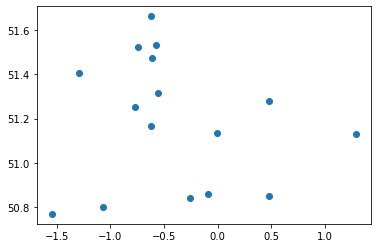

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df['longitude'], y=df['latitude'])
plt.show()

In [ ]:
import geopandas as gpd
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# grid data processing

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('D:/Dis/GIS model/processed/TN402DZ.csv')

In [ ]:
#df1 = df.loc[df['time'].str.contains("min|mins", case=False)]

In [ ]:
df['mins'] = df.time.astype(str).str[-9:]
df

,Unnamed: 0,lat,lon,distance,time,dist,mins
0,0,52.081379,-0.951754,146 mi,2 hours 52 mins,146.0,s 52 mins
1,1,52.081379,-0.933767,144 mi,2 hours 49 mins,144.0,s 49 mins
2,2,52.063393,-1.041686,151 mi,2 hours 52 mins,151.0,s 52 mins
3,3,52.063393,-1.023699,151 mi,2 hours 49 mins,151.0,s 49 mins
4,4,52.063393,-1.005713,151 mi,2 hours 54 mins,151.0,s 54 mins
...,...,...,...,...,...,...,...
6597,6597,50.732399,0.253338,15.9 mi,36 mins,15.0,36 mins
6598,6598,50.732399,0.271325,15.7 mi,36 mins,15.0,36 mins
6599,6599,50.714413,-1.599266,122 mi,2 hours 50 mins,122.0,s 50 mins
6600,6600,50.714413,-1.581279,122 mi,2 hours 52 mins,122.0,s 52 mins


In [ ]:
df['min']=df['mins'].str.extract('(\d+)').astype(float)
df

,Unnamed: 0,lat,lon,distance,time,dist,mins,min
0,0,52.081379,-0.951754,146 mi,2 hours 52 mins,146.0,s 52 mins,52.0
1,1,52.081379,-0.933767,144 mi,2 hours 49 mins,144.0,s 49 mins,49.0
2,2,52.063393,-1.041686,151 mi,2 hours 52 mins,151.0,s 52 mins,52.0
3,3,52.063393,-1.023699,151 mi,2 hours 49 mins,151.0,s 49 mins,49.0
4,4,52.063393,-1.005713,151 mi,2 hours 54 mins,151.0,s 54 mins,54.0
...,...,...,...,...,...,...,...,...
6597,6597,50.732399,0.253338,15.9 mi,36 mins,15.0,36 mins,36.0
6598,6598,50.732399,0.271325,15.7 mi,36 mins,15.0,36 mins,36.0
6599,6599,50.714413,-1.599266,122 mi,2 hours 50 mins,122.0,s 50 mins,50.0
6600,6600,50.714413,-1.581279,122 mi,2 hours 52 mins,122.0,s 52 mins,52.0


In [ ]:
df1=df.loc[df['time'].str.contains("hour|hours", case=False)]
df1

,Unnamed: 0,lat,lon,distance,time,dist,mins,min
0,0,52.081379,-0.951754,146 mi,2 hours 52 mins,146.0,s 52 mins,52.0
1,1,52.081379,-0.933767,144 mi,2 hours 49 mins,144.0,s 49 mins,49.0
2,2,52.063393,-1.041686,151 mi,2 hours 52 mins,151.0,s 52 mins,52.0
3,3,52.063393,-1.023699,151 mi,2 hours 49 mins,151.0,s 49 mins,49.0
4,4,52.063393,-1.005713,151 mi,2 hours 54 mins,151.0,s 54 mins,54.0
...,...,...,...,...,...,...,...,...
6592,6592,50.732399,-0.789876,70.8 mi,1 hour 51 mins,70.0,r 51 mins,51.0
6593,6593,50.732399,-0.771889,70.8 mi,1 hour 50 mins,70.0,r 50 mins,50.0
6599,6599,50.714413,-1.599266,122 mi,2 hours 50 mins,122.0,s 50 mins,50.0
6600,6600,50.714413,-1.581279,122 mi,2 hours 52 mins,122.0,s 52 mins,52.0


In [ ]:
df1['hours'] = df1.time.astype(str).str[:4]
df1['hour']=df1['hours'].str.extract('(\d+)').astype(float)


C:\Users\didar\AppData\Local\Temp\ipykernel_5472\2666268926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hours'] = df1.time.astype(str).str[:4]
C:\Users\didar\AppData\Local\Temp\ipykernel_5472\2666268926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hour']=df1['hours'].str.extract('(\d+)').astype(float)


In [ ]:
df1 = df1.drop(columns=['lat', 'lon','distance','time','mins','min','hours'])
df1

,Unnamed: 0,dist,hour
0,0,146.0,2.0
1,1,144.0,2.0
2,2,151.0,2.0
3,3,151.0,2.0
4,4,151.0,2.0
...,...,...,...
6592,6592,70.0,1.0
6593,6593,70.0,1.0
6599,6599,122.0,2.0
6600,6600,122.0,2.0


In [ ]:
df3 = pd.concat([df, df1], axis=1)
df3

,Unnamed: 0,lat,lon,distance,time,dist,mins,min,Unnamed: 0,dist,hour
0,0,52.081379,-0.951754,146 mi,2 hours 52 mins,146.0,s 52 mins,52.0,0.0,146.0,2.0
1,1,52.081379,-0.933767,144 mi,2 hours 49 mins,144.0,s 49 mins,49.0,1.0,144.0,2.0
2,2,52.063393,-1.041686,151 mi,2 hours 52 mins,151.0,s 52 mins,52.0,2.0,151.0,2.0
3,3,52.063393,-1.023699,151 mi,2 hours 49 mins,151.0,s 49 mins,49.0,3.0,151.0,2.0
4,4,52.063393,-1.005713,151 mi,2 hours 54 mins,151.0,s 54 mins,54.0,4.0,151.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
6597,6597,50.732399,0.253338,15.9 mi,36 mins,15.0,36 mins,36.0,NaN,NaN,NaN
6598,6598,50.732399,0.271325,15.7 mi,36 mins,15.0,36 mins,36.0,NaN,NaN,NaN
6599,6599,50.714413,-1.599266,122 mi,2 hours 50 mins,122.0,s 50 mins,50.0,6599.0,122.0,2.0
6600,6600,50.714413,-1.581279,122 mi,2 hours 52 mins,122.0,s 52 mins,52.0,6600.0,122.0,2.0


In [ ]:
df3['hour'] = df3['hour'].fillna(0)
df3['hour'] = df3['hour']*60 # converting hours to minute
df3

,Unnamed: 0,lat,lon,distance,time,dist,mins,min,Unnamed: 0,dist,hour
0,0,52.081379,-0.951754,146 mi,2 hours 52 mins,146.0,s 52 mins,52.0,0.0,146.0,120.0
1,1,52.081379,-0.933767,144 mi,2 hours 49 mins,144.0,s 49 mins,49.0,1.0,144.0,120.0
2,2,52.063393,-1.041686,151 mi,2 hours 52 mins,151.0,s 52 mins,52.0,2.0,151.0,120.0
3,3,52.063393,-1.023699,151 mi,2 hours 49 mins,151.0,s 49 mins,49.0,3.0,151.0,120.0
4,4,52.063393,-1.005713,151 mi,2 hours 54 mins,151.0,s 54 mins,54.0,4.0,151.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...
6597,6597,50.732399,0.253338,15.9 mi,36 mins,15.0,36 mins,36.0,NaN,NaN,0.0
6598,6598,50.732399,0.271325,15.7 mi,36 mins,15.0,36 mins,36.0,NaN,NaN,0.0
6599,6599,50.714413,-1.599266,122 mi,2 hours 50 mins,122.0,s 50 mins,50.0,6599.0,122.0,120.0
6600,6600,50.714413,-1.581279,122 mi,2 hours 52 mins,122.0,s 52 mins,52.0,6600.0,122.0,120.0


In [ ]:
df3['min'].isnull().values.any()

False

In [ ]:
df3['travel_time'] = df3['min'].astype(int) + df3['hour'].astype(int)
df3

,Unnamed: 0,lat,lon,distance,time,dist,mins,min,Unnamed: 0,dist,hour,travel_time
0,0,52.081379,-0.951754,146 mi,2 hours 52 mins,146.0,s 52 mins,52.0,0.0,146.0,120.0,172
1,1,52.081379,-0.933767,144 mi,2 hours 49 mins,144.0,s 49 mins,49.0,1.0,144.0,120.0,169
2,2,52.063393,-1.041686,151 mi,2 hours 52 mins,151.0,s 52 mins,52.0,2.0,151.0,120.0,172
3,3,52.063393,-1.023699,151 mi,2 hours 49 mins,151.0,s 49 mins,49.0,3.0,151.0,120.0,169
4,4,52.063393,-1.005713,151 mi,2 hours 54 mins,151.0,s 54 mins,54.0,4.0,151.0,120.0,174
...,...,...,...,...,...,...,...,...,...,...,...,...
6597,6597,50.732399,0.253338,15.9 mi,36 mins,15.0,36 mins,36.0,NaN,NaN,0.0,36
6598,6598,50.732399,0.271325,15.7 mi,36 mins,15.0,36 mins,36.0,NaN,NaN,0.0,36
6599,6599,50.714413,-1.599266,122 mi,2 hours 50 mins,122.0,s 50 mins,50.0,6599.0,122.0,120.0,170
6600,6600,50.714413,-1.581279,122 mi,2 hours 52 mins,122.0,s 52 mins,52.0,6600.0,122.0,120.0,172


In [ ]:
df4 = df3.drop(columns=['time','mins','Unnamed: 0'])

In [ ]:
df4.to_csv('D:/Dis/GIS model/processed/final/TN402DZ.csv',index=False)